In [1]:
import numpy as np
import otmol as otm
import pandas as pd
from openbabel import pybel
import matplotlib.pyplot as plt
import os
from experiment_utils import experiment
# %matplotlib widget

In [2]:
molecule_sizes = [6, 8, 3]

In [3]:
data_path = "../Data/S1-MA-W1/"
mol_pair_list_path = os.path.join(data_path, 'list')
molecule_pairs = otm.tl.parse_molecule_pairs(mol_pair_list_path, mol_type='water cluster')

In [4]:
otmol_name_res = experiment(data_path, molecule_pairs, setup='element name', alpha_list=np.linspace(0,0.1,100), molecule_sizes = molecule_sizes, dataset_name = 'S1')
otmol_type_res = experiment(data_path, molecule_pairs, setup='atom type', alpha_list=np.linspace(0,0.1,100), molecule_sizes = molecule_sizes, dataset_name = 'S1')
otmol_conn_res = experiment(data_path, molecule_pairs, setup='atom connectivity', alpha_list=np.linspace(0,0.1,100), molecule_sizes = molecule_sizes, dataset_name = 'S1')

s1maw1-1 s1maw1-2 0.67
s1maw1-1 s1maw1-3 0.58
s1maw1-1 s1maw1-4 0.12
s1maw1-1 s1maw1-5 0.55
s1maw1-1 s1maw1-6 0.79
s1maw1-1 s1maw1-7 0.56
s1maw1-1 s1maw1-8 0.72
s1maw1-1 s1maw1-9 0.80
s1maw1-1 s1maw1-10 0.42
s1maw1-1 s1maw1-11 0.56
s1maw1-1 s1maw1-12 0.55
s1maw1-1 s1maw1-13 0.76
s1maw1-1 s1maw1-14 0.55
s1maw1-1 s1maw1-15 0.49
s1maw1-1 s1maw1-16 0.41
s1maw1-1 s1maw1-17 0.97
s1maw1-1 s1maw1-18 0.92
s1maw1-1 s1maw1-19 0.98
s1maw1-1 s1maw1-20 0.77
s1maw1-1 s1maw1-2 1.08
s1maw1-1 s1maw1-3 0.58
s1maw1-1 s1maw1-4 0.12
s1maw1-1 s1maw1-5 0.55
s1maw1-1 s1maw1-6 0.79
s1maw1-1 s1maw1-7 1.03
s1maw1-1 s1maw1-8 0.72
s1maw1-1 s1maw1-9 0.80
s1maw1-1 s1maw1-10 0.42
s1maw1-1 s1maw1-11 0.56
s1maw1-1 s1maw1-12 0.55
s1maw1-1 s1maw1-13 0.76
s1maw1-1 s1maw1-14 0.55
s1maw1-1 s1maw1-15 0.49
s1maw1-1 s1maw1-16 0.41
s1maw1-1 s1maw1-17 1.14
s1maw1-1 s1maw1-18 1.17
s1maw1-1 s1maw1-19 1.14
s1maw1-1 s1maw1-20 0.96
s1maw1-1 s1maw1-2 1.08
s1maw1-1 s1maw1-3 0.58
s1maw1-1 s1maw1-4 0.12
s1maw1-1 s1maw1-5 0.55
s1maw1-1 s1m

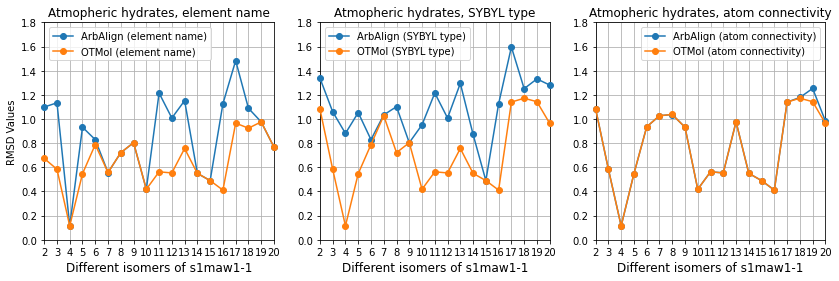

In [5]:
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')
combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(KM-ByAtomName)': 'ArbAlign (element name)', 
        'RMSD(KM-ByAtomType)': 'ArbAlign (SYBYL type)', 
        'RMSD(KM-byAtomConn)': 'ArbAlign (atom connectivity)'
        }),  
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'})
    ], axis=1)

plt.figure(figsize=(14,4))
plt.subplot(131)
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("Atmopheric hydrates, element name")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylabel("RMSD Values")
plt.ylim(0, 1.8)
plt.xticks(range(2,21))
plt.xlim(2,20)
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(132)
columns_to_plot = ["ArbAlign (SYBYL type)", "OTMol (SYBYL type)"]
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("Atmopheric hydrates, SYBYL type")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylim(0, 1.8)
plt.xticks(range(2,21))
plt.xlim(2,20)
plt.legend()
plt.grid(True)

plt.subplot(133)
columns_to_plot = ["ArbAlign (atom connectivity)", "OTMol (atom connectivity)"]
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column, clip_on=False, zorder=10)
plt.title("Atmopheric hydrates, atom connectivity")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylim(0, 1.8)
plt.xticks(range(2,21))
plt.xlim(2,20)
plt.legend()
plt.grid(True)
plt.savefig("../images/S1MAW1.png", dpi=300, bbox_inches='tight')

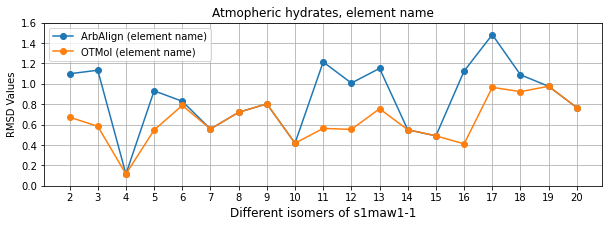

In [6]:
arbalign_res = pd.read_csv(os.path.join(data_path, 'rmsd-2017.dat'), sep='\s+')
combined_df = pd.concat([
    arbalign_res.rename(columns={
        'RMSD(KM-ByAtomName)': 'ArbAlign (element name)', 
        'RMSD(KM-ByAtomType)': 'ArbAlign (SYBYL type)', 
        'RMSD(KM-byAtomConn)': 'ArbAlign (atom connectivity)'
        }),  
    otmol_name_res.rename(columns={'RMSD(OTMol+element name)': 'OTMol (element name)'}), 
    otmol_type_res.rename(columns={'RMSD(OTMol+atom type)': 'OTMol (SYBYL type)'}), 
    otmol_conn_res.rename(columns={'RMSD(OTMol+atom connectivity)': 'OTMol (atom connectivity)'})
    ], axis=1)
columns_to_plot = ["ArbAlign (element name)", "OTMol (element name)"]
plt.figure(figsize=(10,3))
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column)
plt.title("Atmopheric hydrates, element name")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylabel("RMSD Values")
plt.ylim(0, 1.6)
plt.xticks(range(2,21))
plt.legend()
plt.grid(True)
plt.savefig("../images/S1_element_name.png", dpi=300, bbox_inches='tight')

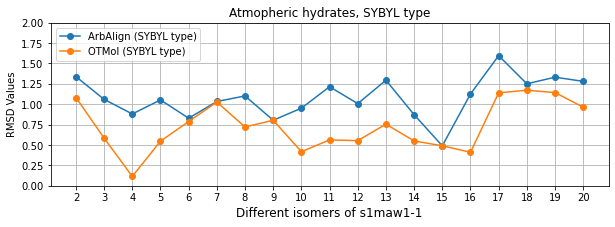

In [7]:
columns_to_plot = ["ArbAlign (SYBYL type)", "OTMol (SYBYL type)"]
plt.figure(figsize=(10,3))
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column)
plt.title("Atmopheric hydrates, SYBYL type")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylabel("RMSD Values")
plt.ylim(0, 2)
plt.xticks(range(2,21))
plt.legend()
plt.grid(True)
plt.savefig("../images/S1_SYBYL_type.png", dpi=300, bbox_inches='tight')

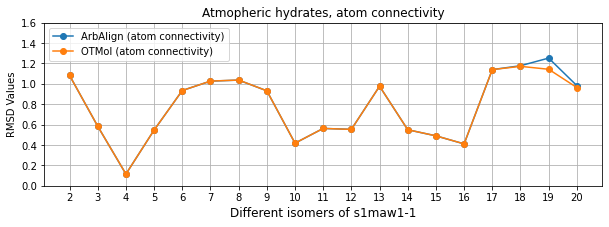

In [8]:
columns_to_plot = ["ArbAlign (atom connectivity)", "OTMol (atom connectivity)"]
plt.figure(figsize=(10,3))
for column in columns_to_plot:
    plt.plot(range(2,21), combined_df[column], marker='o', label=column)
plt.title("Atmopheric hydrates, atom connectivity")
plt.xlabel("Different isomers of s1maw1-1", fontsize=12)
plt.ylabel("RMSD Values")
plt.ylim(0, 1.6)
plt.xticks(range(2,21))
plt.legend()
plt.grid(True)
plt.savefig("../images/S1_atom_connectivity.png", dpi=300, bbox_inches='tight')

In [9]:
molecule_pairs[0]
molA = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-1.xyz")))
molB = next(pybel.readfile("xyz", os.path.join(data_path, "s1maw1-2.xyz")))
X_A, T_A, B_A = otm.tl.process_molecule(molA) # Output (1) spatial coordinates, (2) atom types, and (3) bonds as numpy arrays.
X_B, T_B, B_B = otm.tl.process_molecule(molB) # Output (1) spatial coordinates, (2) atom types, and (3) bonds as numpy arrays.
print(T_A)
otm.tl.add_molecule_indices(T_A, T_B, molecule_sizes=[6, 8, 3])

['S' 'O' 'O' 'O' 'O' 'H' 'H' 'N' 'H' 'H' 'C' 'H' 'H' 'H' 'O' 'H' 'H']


(array(['S_0', 'O_0', 'O_0', 'O_0', 'O_0', 'H_0', 'H_1', 'N_1', 'H_1',
        'H_1', 'C_1', 'H_1', 'H_1', 'H_1', 'O_2', 'H_2', 'H_2'],
       dtype='<U3'),
 array(['S_0', 'O_0', 'O_0', 'O_0', 'O_0', 'H_0', 'H_1', 'N_1', 'H_1',
        'H_1', 'C_1', 'H_1', 'H_1', 'H_1', 'O_2', 'H_2', 'H_2'],
       dtype='<U3'))